In [1]:
import tensorflow as tf
import numpy as np

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout

from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.optimizers import SGD, Adam
from tensorflow.keras.callbacks import ReduceLROnPlateau, ModelCheckpoint, EarlyStopping

from tensorflow.keras.utils import to_categorical


In [2]:
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

print(f'X_train.shape : {X_train.shape},y_train.shape : {y_train.shape}')
print(f'X_test.shape : {X_test.shape},y_test.shape : {y_test.shape}')

4431872/4422102 [==============================] - 0s 0us/step
X_train.shape : (60000, 28, 28),y_train.shape : (60000,)
X_test.shape : (10000, 28, 28),y_test.shape : (10000,)


<function matplotlib.pyplot.show>

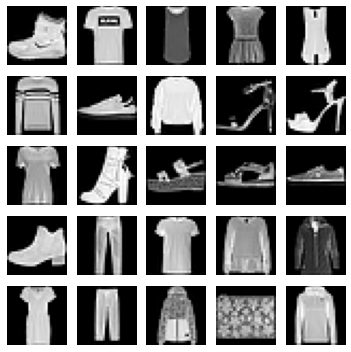

In [3]:
import matplotlib.pyplot as plt

plt.figure(figsize=(5,5))

for index in range(25):
    plt.subplot(5, 5, index+1)
    plt.imshow(X_train[index], cmap='gray')
    plt.axis('off')

plt.tight_layout()
plt.show

In [4]:
# Normalize

X_train = X_train / 255.0
X_test = X_test / 255.0

print(f'X_train.min : {X_train.min()}, X_train.max : {X_train.max()}')
print(f'X_test.min : {X_test.min()}, X_test.max : {X_test.max()}')

X_train.min : 0.0, X_train.max : 1.0
X_test.min : 0.0, X_test.max : 1.0


In [5]:
# shuffle

s = np.arange(len(X_train))

np.random.shuffle(s)

X_train = X_train[s]

print(X_train[:2])

[[[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]

 [[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]]


In [6]:
# VAL_SPLIT_RATIO = 0.2

# val_nums = int(VAL_SPLIT_RATIO*len(X_train))

# print('val_nums = ', val_nums)

# X_val = X_train[:val_nums]
# y_val = y_train[:val_nums]

# X_train = X_train[val_nums:]
# y_train = y_train[val_nums:]


# print(X_train.shape, y_train.shape)
# print(X_val.shape, y_val.shape)

In [7]:
model = Sequential()

model.add(Flatten(input_shape=(28, 28, 1)))
model.add(Dense(100, activation='relu'))
model.add(Dense(10, activation='softmax'))

In [8]:
model.compile(optimizer=SGD(0.1),loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 100)               78500     
                                                                 
 dense_1 (Dense)             (None, 10)                1010      
                                                                 
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________


In [9]:
file_path = './modelchpoint_test.h5'

checkpoint = ModelCheckpoint(file_path,
                             monitor='val_loss', # val_loss가 개선되었을 때 호출
                             verbose=1, # log 출력
                             save_best_only=True, # best 값만 저장
                             mode='auto') # 자동으로 best를 찾음

stopping = EarlyStopping(monitor='val_loss', 
                         patience=10) # 5 epoch 동안 개선되지 않으면 stop

In [10]:
hist = model.fit(X_train, y_train, epochs=50, validation_split=0.2, callbacks=[checkpoint, stopping])

Epoch 1/50
1500/1500 [==============================] - ETA: 0s - loss: 2.3058 - accuracy: 0.0995
Epoch 1: val_loss improved from inf to 2.30360, saving model to ./modelchpoint_test.h5
1500/1500 [==============================] - 8s 4ms/step - loss: 2.3058 - accuracy: 0.0995 - val_loss: 2.3036 - val_accuracy: 0.0958
Epoch 2/50
1498/1500 [============================>.] - ETA: 0s - loss: 2.3028 - accuracy: 0.1004
Epoch 2: val_loss did not improve from 2.30360
1500/1500 [==============================] - 3s 2ms/step - loss: 2.3028 - accuracy: 0.1003 - val_loss: 2.3036 - val_accuracy: 0.1007
Epoch 3/50
1491/1500 [============================>.] - ETA: 0s - loss: 2.3020 - accuracy: 0.1053
Epoch 3: val_loss improved from 2.30360 to 2.30358, saving model to ./modelchpoint_test.h5
1500/1500 [==============================] - 3s 2ms/step - loss: 2.3020 - accuracy: 0.1053 - val_loss: 2.3036 - val_accuracy: 0.1033
Epoch 4/50
1478/1500 [============================>.] - ETA: 0s - loss: 2.3011 - a

In [11]:
# test data 이용하여 정확도 검증
model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 2.2934 - accuracy: 0.1182


[2.2933669090270996, 0.11819999665021896]

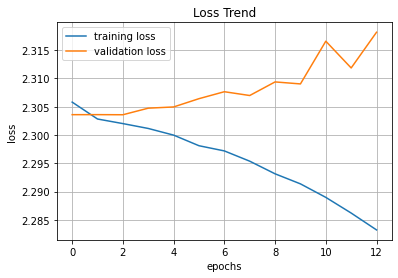

In [12]:
# 손실함수 그래프
import matplotlib.pyplot as plt

plt.title('Loss Trend')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.grid()

plt.plot(hist.history['loss'], label='training loss')
plt.plot(hist.history['val_loss'], label='validation loss')
plt.legend(loc='best')

plt.show()

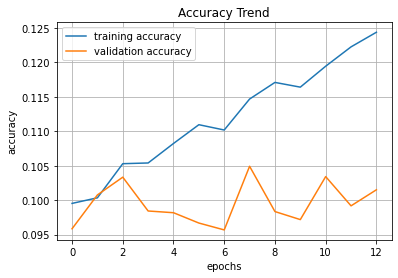

In [13]:
# 정확도 함수 그래프

plt.title('Accuracy Trend')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.grid()

plt.plot(hist.history['accuracy'], label='training accuracy')
plt.plot(hist.history['val_accuracy'], label='validation accuracy')
plt.legend(loc='best')

plt.show()

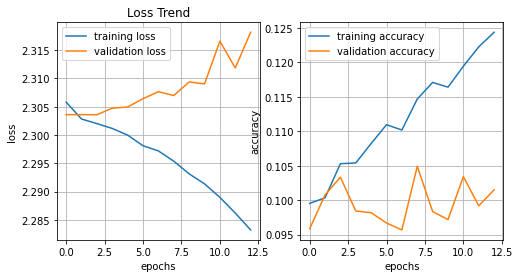

In [14]:
plt.figure(figsize=(8, 4))

plt.subplot(1, 2, 1)

plt.title('Loss Trend')
plt.grid()
plt.xlabel('epochs')
plt.ylabel('loss')

plt.plot(hist.history['loss'], label='training loss')
plt.plot(hist.history['val_loss'], label='validation loss')
plt.legend(loc='best')


plt.subplot(1, 2, 2)

plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.grid()

plt.plot(hist.history['accuracy'], label='training accuracy')
plt.plot(hist.history['val_accuracy'], label='validation accuracy')
plt.legend(loc='best')

plt.show()